------------------------------------------------------------------------------------------------------------------------------------------------------

## COMPARASSON BETWEEN SETUP NOTEBOOK


##### PLEASE! When you are done with the tutorial, move to the ```notebooks``` folder to start your own analysis 
 In this way, you will be able to keep the tutorial as a reference for future use (or others to use it).

------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import sys; sys.path.insert(0, '../'); from lib import *;
figure_features()

You don't have latex installed. Changing default configuration to tex=Foptionalalse


In [2]:
# Set options for general visualitation
OPT  = {
    "MICRO_SEC":   True,                # Time in microseconds (True/False)
    "NORM":        False,               # Runs can be displayed normalised (True/False)
    "ALIGN":       True,                # Aligns waveforms in peaktime (True/False)
    "LOGY":        False,               # Runs can be displayed in logy (True/False)
    "SHOW_AVE":    "",                  # If computed, vis will show average (AveWvf,AveWvfSPE,etc.)
    "SHOW_PARAM":  False,               # Print terminal information (True/False)
    "CHARGE_KEY":  "ChargeAveRange",    # Select charge info to be displayed. Default: "ChargeAveRange" (if computed)
    "PEAK_FINDER": False,               # Finds possible peaks in the window (True/False)
    "LEGEND":      True,                # Shows plot legend (True/False)
    "SHOW":        True
    }

In [3]:
setups = ["Jan22","Feb22","Feb22_2"]; OV = 1
run_keys = ["CALIB_RUNS","LIGHT_RUNS","ALPHA_RUNS","MUONS_RUNS","NOISE_RUNS"]
nruns = dict.fromkeys(run_keys)
for key in run_keys:
    aux = dict.fromkeys(setups)
    for setup in setups:
        info = read_input_file(setup) # Read input file
        try:               aux[setup] = info[key][OV]
        except IndexError: continue
    nruns[key] = aux
channels = [0,6]

You are plotting ALPHA_RUNS, AnaAveWvf



load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!



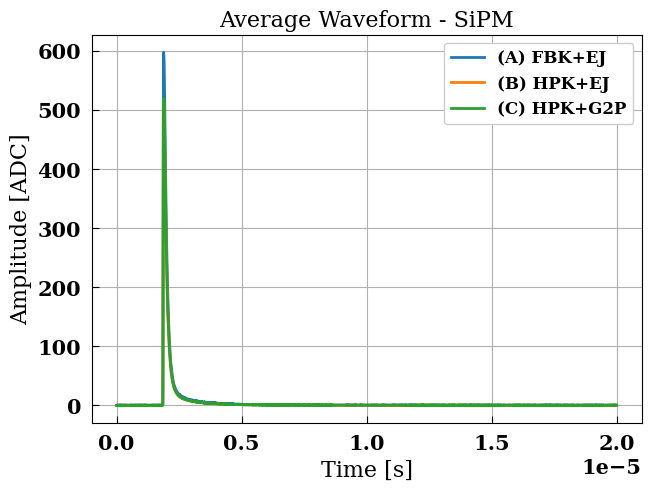

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!



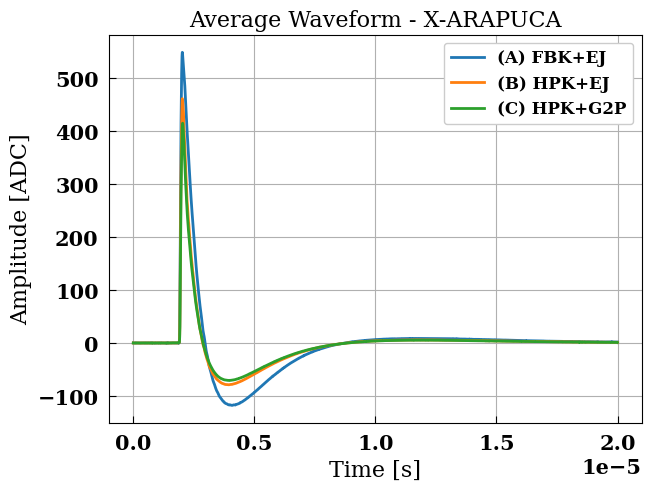

In [4]:
RUN2PLOT = "ALPHA_RUNS"; key = "AnaAveWvf"
labels = ["(A) FBK+EJ","(B) HPK+EJ","(C) HPK+G2P"]
titles = ["Average Waveform - SiPM", "Average Waveform - X-ARAPUCA"]

print("You are plotting %s, %s\n"%(RUN2PLOT,key))
for c,ch in enumerate(channels):
    for s,setup in enumerate(nruns[RUN2PLOT]):
        info = read_input_file(setup) # Read input file
        run = nruns[RUN2PLOT][setup]
        fig = plt.figure
        my_runs = load_npy(np.asarray([run]).astype(int),np.asarray([ch]).astype(int),preset="EVA",info=info,compressed=True)
        time_wvf = np.arange(len(my_runs[run][ch][key][0]))*4e-9
        AveWvf = my_runs[run][ch][key][0]
        plt.plot(time_wvf, AveWvf,label=labels[s])
        plt.legend()
        plt.grid()
        plt.xlabel("Time [s]");
        plt.ylabel("Amplitude [ADC]")
    plt.title(titles[c])
    # plt.title("Average Waveform - Channel %i"%ch)
    plt.show()

del my_runs, time_wvf